In [1]:
print("aashnaDOGRA")

aashnaDOGRA


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### **Preprocessing the data**

- Removed null values
- Adjusted data to 2020
- Formatted month column for accessibility



In [3]:
csv_path = "/content/dataset.csv"
df = pd.read_csv(csv_path)

In [4]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

,0
MONATSZAHL,0
AUSPRAEGUNG,0
JAHR,0
MONAT,0
WERT,168
VORJAHRESWERT,168
VERAEND_VORMONAT_PROZENT,330
VERAEND_VORJAHRESMONAT_PROZENT,253
ZWOELF_MONATE_MITTELWERT,322


In [6]:
df_filtered = df.copy()

df_filtered.dropna(inplace=True)

df_filtered = df_filtered[df_filtered['JAHR'] <= 2020]

df_filtered['MONAT'] = df_filtered['MONAT'].astype(str).str[-2:].astype(int)

In [7]:
df_filtered.isnull().sum()

,0
MONATSZAHL,0
AUSPRAEGUNG,0
JAHR,0
MONAT,0
WERT,0
VORJAHRESWERT,0
VERAEND_VORMONAT_PROZENT,0
VERAEND_VORJAHRESMONAT_PROZENT,0
ZWOELF_MONATE_MITTELWERT,0


In [8]:
df_filtered.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
51,Alkoholunfälle,insgesamt,2020,1,28.0,22.0,-20.00,27.27,37.0
52,Alkoholunfälle,insgesamt,2020,2,40.0,28.0,42.86,42.86,38.0
53,Alkoholunfälle,insgesamt,2020,3,27.0,34.0,-32.50,-20.59,37.0
54,Alkoholunfälle,insgesamt,2020,4,26.0,36.0,-3.70,-27.78,36.0
55,Alkoholunfälle,insgesamt,2020,5,40.0,39.0,53.85,2.56,36.0


### **Historical Analysis**
Yearly analysis for Category col ('MONATSZAHL')
- Line graph
- Bar graph

(Also analysed with null values to compare changes)

In [9]:
# Group by 'MONATSZAHL' and 'JAHR', summing 'WERT' (number of accidents)
grouped_data = df_filtered.groupby(['MONATSZAHL', 'JAHR'])['WERT'].sum().reset_index()

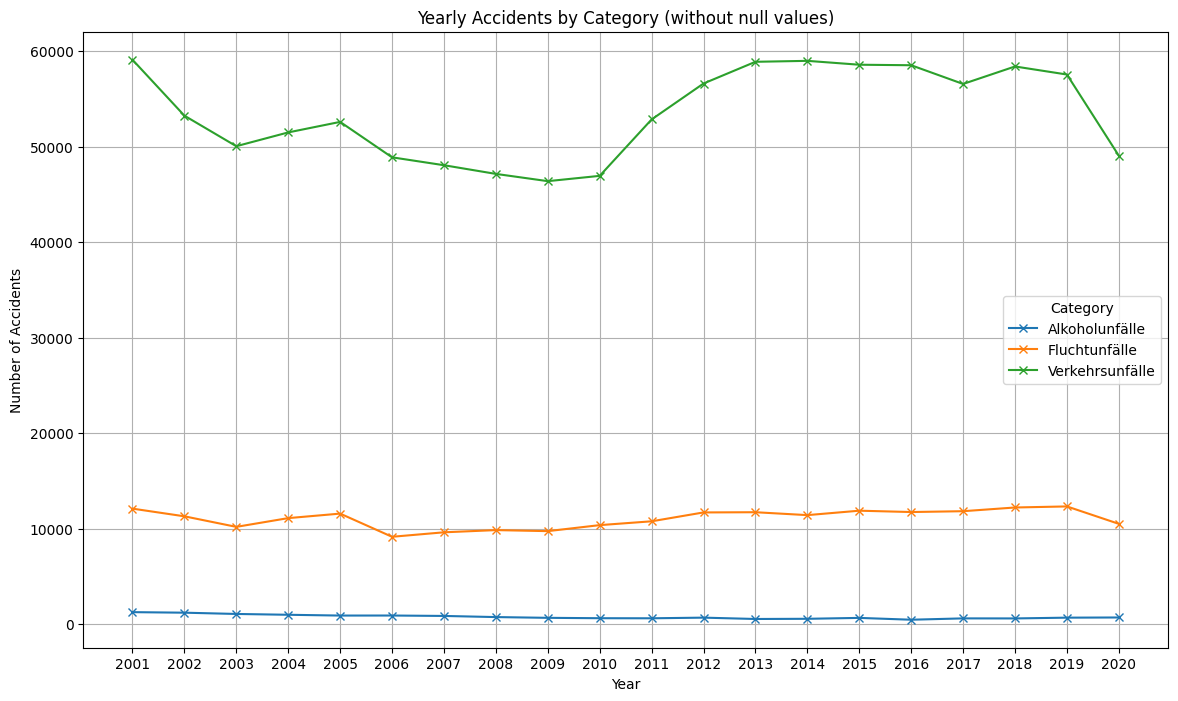

In [10]:
# Line Chart
plt.figure(figsize=(14, 8))
for category in grouped_data['MONATSZAHL'].unique():
    category_data = grouped_data[grouped_data['MONATSZAHL'] == category]
    plt.plot(category_data['JAHR'], category_data['WERT'], label=category, marker='x')

years = sorted(grouped_data['JAHR'].unique())
plt.xticks(years)
plt.title('Yearly Accidents by Category (without null values)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Category')
plt.grid(True)
plt.savefig('yearly_accidents_plot1.png', bbox_inches='tight', dpi=300)
plt.show()


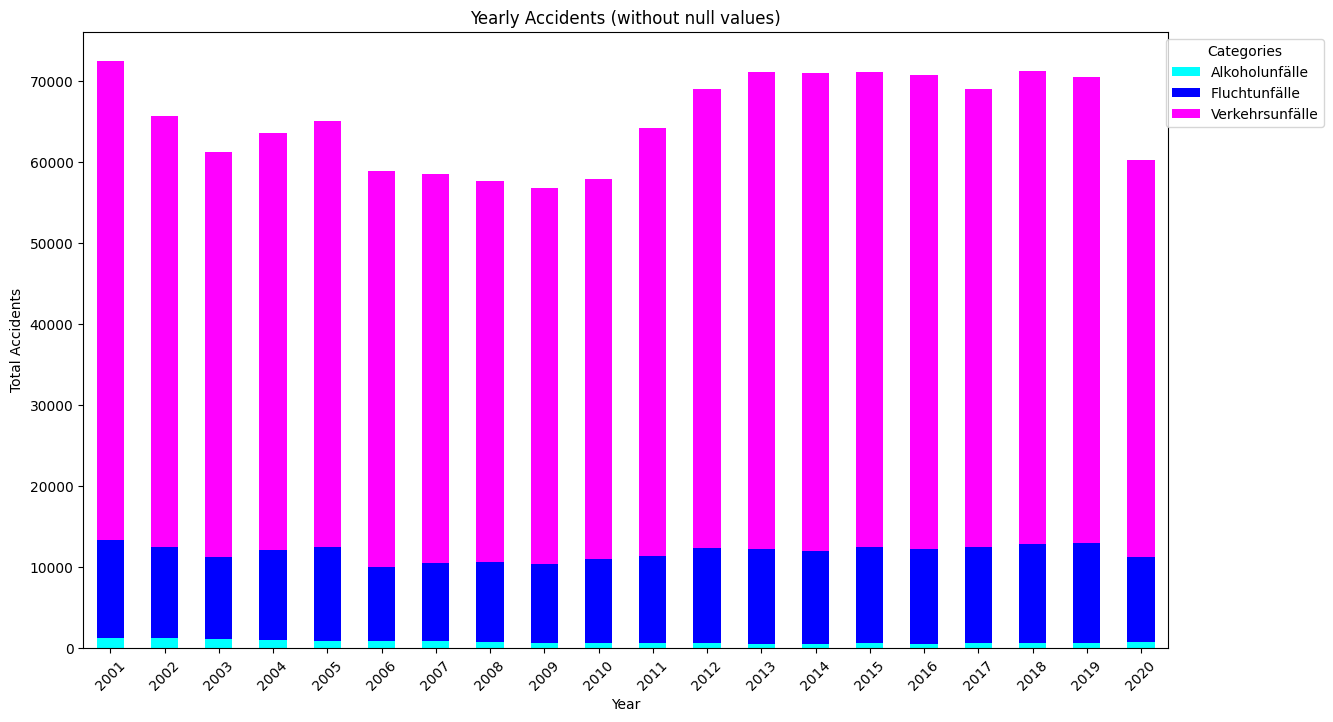

In [11]:
# Bar Chart

colors = ['cyan', 'blue', 'magenta']

pivot = grouped_data.pivot(index='JAHR', columns='MONATSZAHL', values='WERT')

pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

plt.title('Yearly Accidents (without null values)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.savefig('yearly_accidents_plot2.png', bbox_inches='tight', dpi=300)
plt.show()


In [12]:
df_filtered_null = df.copy()
df_filtered_null.columns = df_filtered_null.columns.str.strip()
df_filtered_null = df_filtered_null[df_filtered_null['JAHR'] <= 2020]

In [13]:
print(df_filtered_null.isnull().sum())

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                                0
VORJAHRESWERT                      84
VERAEND_VORMONAT_PROZENT          148
VERAEND_VORJAHRESMONAT_PROZENT     85
ZWOELF_MONATE_MITTELWERT          140
dtype: int64


In [14]:
grouped_data_null = df_filtered_null.groupby(['MONATSZAHL', 'JAHR'])['WERT'].sum().reset_index()

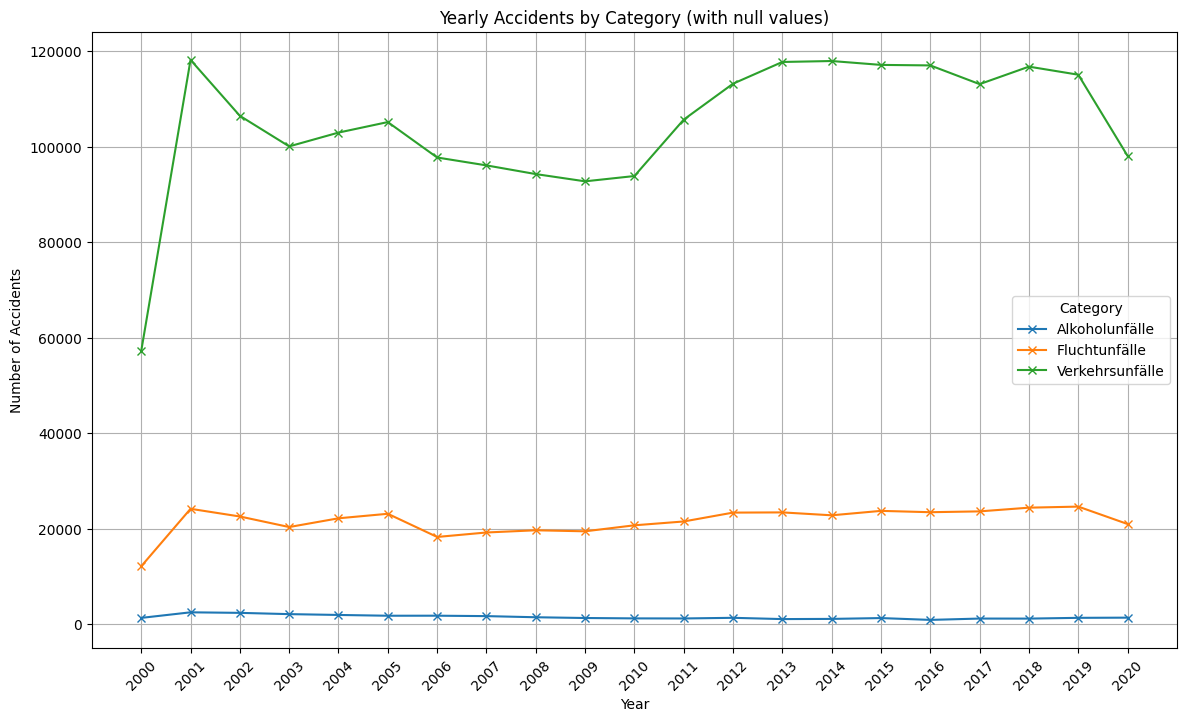

In [15]:
# Line Chart

plt.figure(figsize=(14, 8))

for category in grouped_data_null['MONATSZAHL'].unique():
    category_data = grouped_data_null[grouped_data_null['MONATSZAHL'] == category]
    plt.plot(category_data['JAHR'], category_data['WERT'], label=category, marker='x')

plt.title('Yearly Accidents by Category (with null values)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
years = sorted(grouped_data_null['JAHR'].unique())
plt.xticks(years)
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('yearly_accidents_plot3.png', bbox_inches='tight', dpi=300)
plt.show()


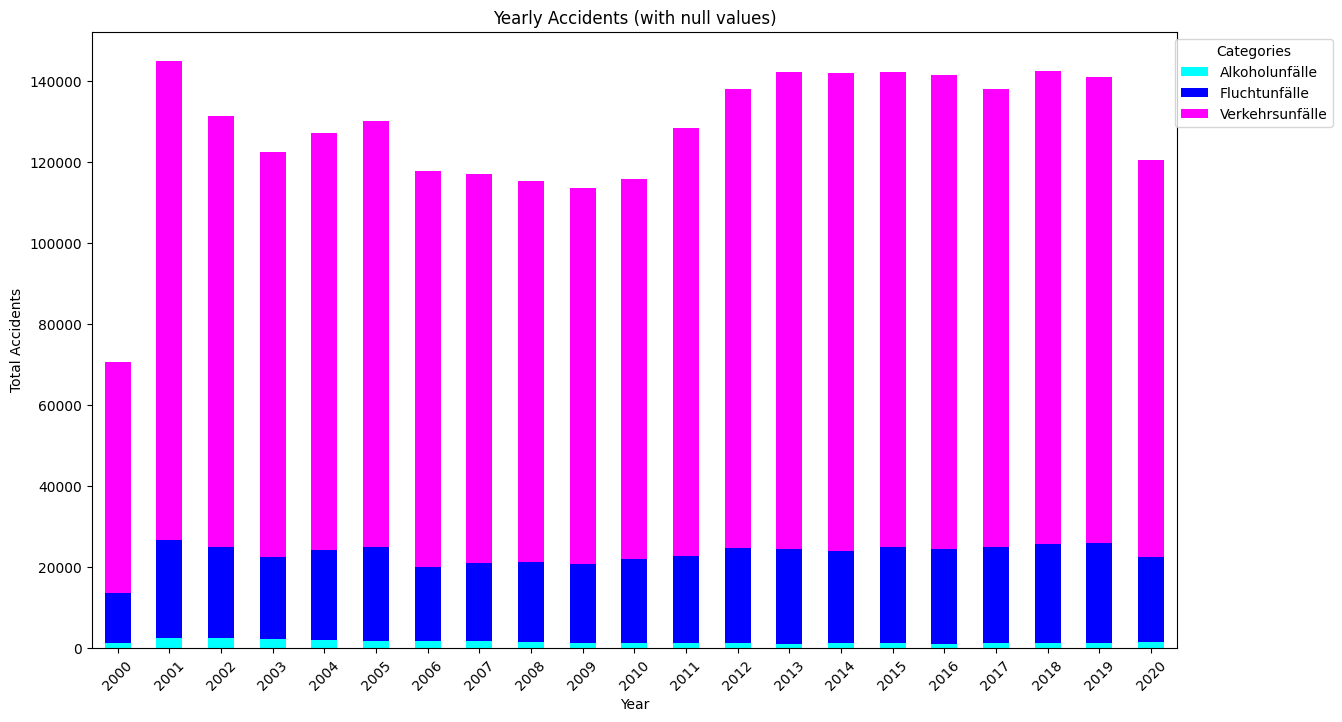

In [19]:
# Bar Chart

colors = ['cyan', 'blue', 'magenta']

pivot = grouped_data_null.pivot(index='JAHR', columns='MONATSZAHL', values='WERT')

pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

plt.title('Yearly Accidents (with null values)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.savefig('yearly_accidents_plot4.png', bbox_inches='tight', dpi=300)
plt.show()
